### Problem statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
* The chain already has restaurants in various cities and you have data for profits and populations from the cities.
* You also have data on cities that are candidates for a new restaurant.
* For these cities, you have the city population. Can you use the data to help you identify which cities may potentially give your business higher profits?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


In [9]:
## Import data
def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    print(data)
    X_train = data[:,0]
    Y_train = data[:,1]
    print(X_train)
    print(Y_train)
    return X_train,Y_train

In [10]:
X_train,Y_train = load_data()

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

In [6]:
import os
os.listdir()

['.ipynb_checkpoints',
 '02.Linear Regression - Restaurant profit prediction.ipynb',
 'ex1data1.txt',
 'ex2data2.txt']

In [37]:
## Regressor
sgd = SGDRegressor()
scalar = StandardScaler()
X_norm =  scalar.fit_transform(X_train.reshape(-1,1))
#X_norm = X_train.reshape(-1,1)
#print(X_norm)
sgd.fit(X_norm,Y_train)
print(f"Number of iterations = {sgd.n_iter_} values update = {sgd.t_}")

Number of iterations = 30 values update = 2911.0


In [38]:
w_norm = sgd.coef_
b_norm = sgd.intercept_
print(f"W norm = {w_norm} B norm = {b_norm}")

W norm = [4.57432008] B norm = [5.80712467]


In [47]:
y_sgd_predict = sgd.predict(X_norm)
print(f"Y prediction = {y_sgd_predict}")
print(f"Y train = {Y_train}")

Y prediction = [ 3.3717308   2.67974008  6.23344038  4.43288622  3.07433163  6.07220559
  4.99512868  6.30413655  3.81860187  2.11761643  2.89717535 12.9411403
  2.92485973  6.10250395  2.81400339  2.50353434  3.67507083  2.20732333
  3.7513514   4.51320657  3.4655963  20.19611172  2.63506485  3.62837571
  2.72394004 18.6217853  11.35374399  9.13067627 11.76722746 22.49284604
  2.35263663  3.94122111  7.10032986  3.1123531   5.86807783  5.53812278
  5.73120055  2.77313031 11.36324936  3.66081278  2.53620904  4.28947399
 10.0229926   2.97203012  5.4089686   4.53970278  2.1361519   3.00494245
 10.01348723  2.69625565  5.07093399  2.41834248  4.93274971  5.14566993
  3.63633646  3.66734772  3.56670964  2.81281522  7.17399645  7.34438016
  6.59797121  2.26578134 21.39497615 13.82513943 18.63841969  4.68834296
  5.96788419  8.27400506  2.64611484 20.28047185  8.15518797  4.82652723
  3.24827985  4.69749188  2.0847041   3.89191202  5.06903291  2.09611054
  8.31915555  2.18070831  2.91915651 

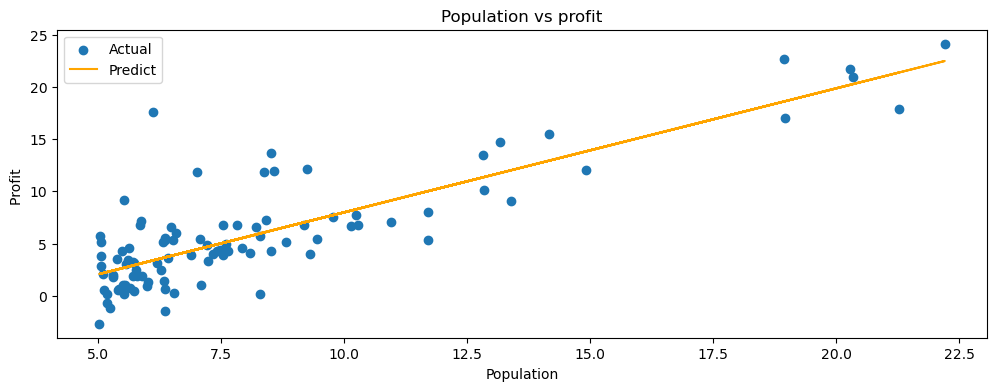

In [52]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(X_train,Y_train, label="Actual")
ax.plot(X_train,y_sgd_predict,color="orange",label="Predict")
ax.set_xlabel("Population")
ax.set_ylabel("Profit ")
ax.set_title("Population vs profit")
ax.legend()